### 1. Importación de librerias necesarias para el proyecto

In [ ]:
#Librerias necesarias para el proyecto

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [4]:
#Cargar el modelo SSD desde TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector = hub.load(model_url)

In [5]:
def detect_with_ssd(image_url):
    """Toma la URL de una imagen, la procesa con SSD y muestra los resultados."""
    try:
        # Descargar y leer la imagen
        resp = requests.get(image_url, stream=True)
        image_np = np.frombuffer(resp.raw.read(), np.uint8)
        image_np = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
        image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
        
        # Convertir a tensor y añadir una dimensión de batch
        input_tensor = tf.convert_to_tensor(image_np)
        input_tensor = input_tensor[tf.newaxis, ...]
        
        # Realizar la detección
        results = detector(input_tensor)
        
        # Procesar los resultados
        result = {key:value.numpy() for key,value in results.items()}
        
        # Dibujar los cuadros delimitadores en la imagen
        scores = result['detection_scores'][0]
        boxes = result['detection_boxes'][0]
        
        for i in range(len(scores)):
            if scores[i] > 0.5: # Umbral de confianza del 50%
                ymin, xmin, ymax, xmax = boxes[i]
                h, w, _ = image_np.shape
                (left, right, top, bottom) = (xmin * w, xmax * w, ymin * h, ymax * h)
                cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)
        
        # Mostrar la imagen
        plt.figure(figsize=(8, 8))
        plt.imshow(image_np)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"No se pudo procesar la imagen desde {image_url}. Error: {e}")

### **Probar modelo con ejemplos**

--- Procesando imagen con SSD: https://ultralytics.com/images/bus.jpg... ---


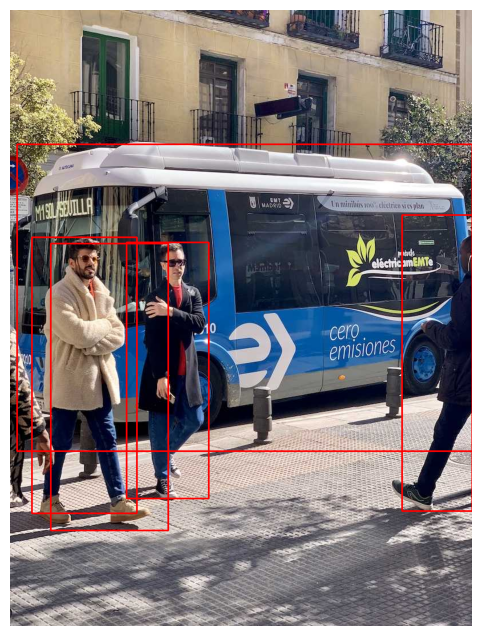

--- Procesando imagen con SSD: https://ultralytics.com/images/zidane.jpg... ---


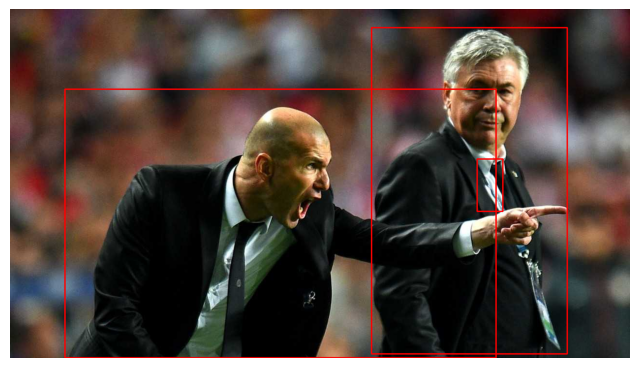

--- Procesando imagen con SSD: https://images.pexels.com/photos/1099680/pexels-ph... ---


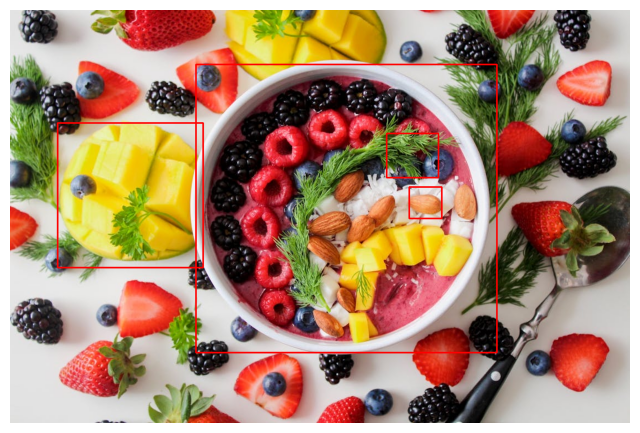

--- Procesando imagen con SSD: https://images.pexels.com/photos/1571460/pexels-ph... ---


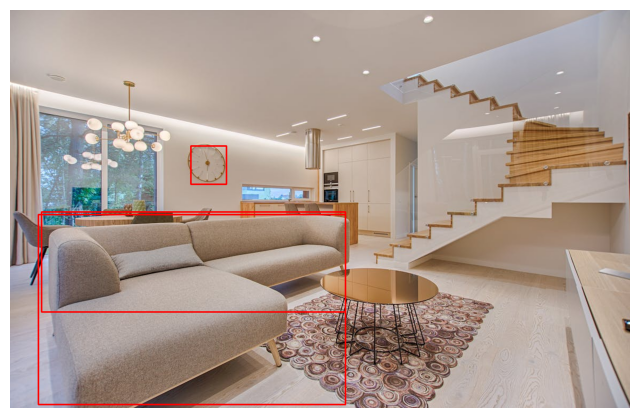

--- Procesando imagen con SSD: https://images.pexels.com/photos/3785931/pexels-ph... ---


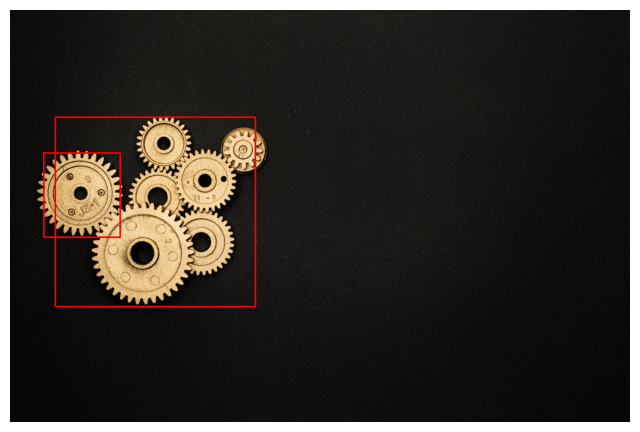

In [6]:
image_urls = [
    'https://ultralytics.com/images/bus.jpg',
    'https://ultralytics.com/images/zidane.jpg',
    'https://images.pexels.com/photos/1099680/pexels-photo-1099680.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1',
    'https://images.pexels.com/photos/1571460/pexels-photo-1571460.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1',
    'https://images.pexels.com/photos/3785931/pexels-photo-3785931.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'
]

for url in image_urls:
    print(f"--- Procesando imagen con SSD: {url[:50]}... ---")
    detect_with_ssd(url)